# Jupyter notebook to illustrate the adjustments

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import sys
sys.path.append("local_path_to_canonical_sets")

from canonical_sets import LUCIDGAN
from canonical_sets.data import Adult
from canonical_sets.evaluation.adultclassifier import AdultClassifier

## Training models

### Training classifier

In [ ]:

adult = Adult(test_path="local_path_to_test_adult.csv", 
              train_path="local_path_to_train_adult.csv",
              preprocess=True,
           )

adult_classifier = AdultClassifier(adult)



# ### Training classifier ###
# adult_classifier.train_adult_classifier(5)
# adult_classifier.save_model("local_path_to_data_folder", "adultclassifier.pth")

### Loading classifier ####
adult_classifier.load_model(
    "/local_path_to_adultclassifier.pth"
)





### Training LUCID-GAN

Previously, it wasn't possible to train the LUCID-GAN model if no conditional/conditions were provided.

Epoch 1, Loss G: -0.3634, Loss R:  2.3175, Loss D: -0.2921: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


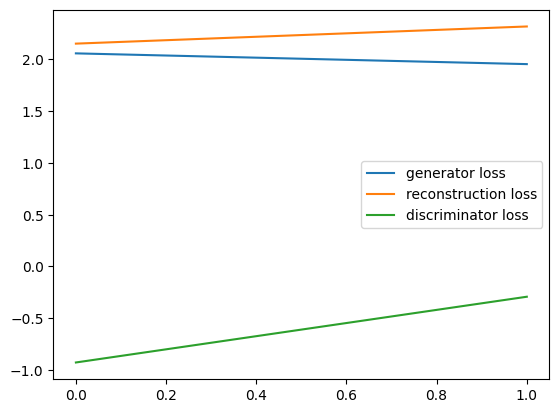

In [5]:

# LUCID-GAN
adult_preds = adult_classifier.predict(adult.test_data)[:, 1]
adult_test_data = adult.inverse_preprocess(adult.test_data)

adult_data = pd.concat([adult_test_data, 
                        pd.DataFrame(adult_preds, columns=["preds"]),
                        adult.test_labels[">50K"].to_frame(name="labels").astype("float32")
                        ], axis=1)


model_name = "adultlucidgan_with_labels.pth"

### training lucid gan ###
adult_lucidgan = LUCIDGAN(epochs=2)

adult_lucidgan.set_random_state(1234)
adult_lucidgan.fit(adult_data)


adult_lucidgan.save(
    path="local_path_to_data_folder" + model_name
    )


plt.plot(adult_lucidgan.generator_loss, label = "generator loss")
plt.plot(adult_lucidgan.reconstruction_loss, label = "reconstruction loss")
plt.plot(adult_lucidgan.discriminator_loss, label = "discriminator loss")
plt.legend()
plt.show()